# Datasets

## Download UTKFace (età) e FER-2013 (emozioni)

In [ ]:
import os

print("\n📂 Configurazione Kaggle...")
if not os.path.exists("kaggle.json"):
    print("Carica il tuo file 'kaggle.json' ora:")
    uploaded = files.upload()

    # Spostiamo il file nella cartella corretta per l'autenticazione
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("✅ Configurazione Kaggle completata.")
else:
    print("✅ File kaggle.json già presente.")

# 3. DOWNLOAD DEI DATASET
# Creiamo una cartella per i dati
os.makedirs('data', exist_ok=True)

# Dataset Emozioni: FER-2013
print("\n⬇️ Scaricamento Dataset Emozioni (FER-2013)...")
if not os.path.exists('./data/fer2013'):
    !kaggle datasets download -d msambare/fer2013 -p ./data
    print("Decompressione FER-2013...")
    with zipfile.ZipFile("./data/fer2013.zip", 'r') as zip_ref:
        zip_ref.extractall("./data/fer2013")
    # Pulizia
    os.remove("./data/fer2013.zip")
    print("✅ Dataset Emozioni pronto.")
else:
    print("✅ Dataset Emozioni già presente.")

# Dataset Età: UTKFace
print("\n⬇️ Scaricamento Dataset Età (UTKFace)...")
if not os.path.exists('./data/utkface'):
    !kaggle datasets download -d jangedoo/utkface-new -p ./data
    print("Decompressione UTKFace...")
    with zipfile.ZipFile("./data/utkface-new.zip", 'r') as zip_ref:
        zip_ref.extractall("./data/utkface")
    # Pulizia
    os.remove("./data/utkface-new.zip")
    print("✅ Dataset Età pronto.")
else:
    print("✅ Dataset Età già presente.")


### Verifica rapida download


🔍 Verifica struttura dati...


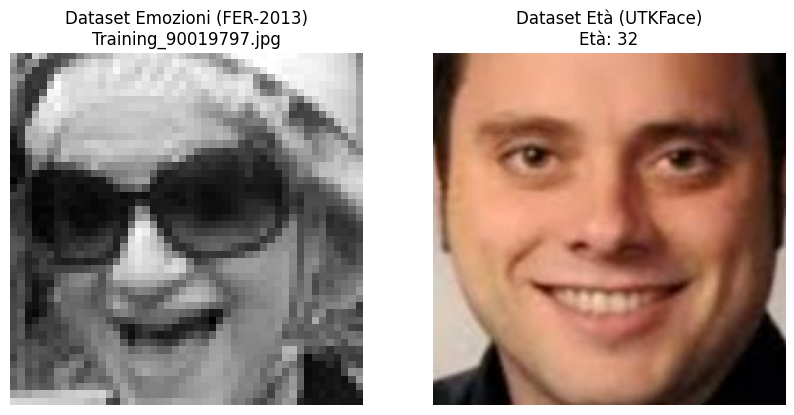

In [ ]:
# Controlliamo se tutto è al posto giusto visualizzando un'immagine a caso
def check_setup():
    print("\n🔍 Verifica struttura dati...")

    # Path tipici dopo l'estrazione
    fer_path = './data/fer2013/train/angry' # Esempio
    utk_path = './data/utkface/utkface_aligned_cropped/UTKFace'     # Esempio

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Emozione
    if os.path.exists(fer_path):
        img_name = random.choice(os.listdir(fer_path))
        img_path = os.path.join(fer_path, img_name)
        ax[0].imshow(Image.open(img_path), cmap='gray')
        ax[0].set_title(f"Dataset Emozioni (FER-2013)\n{img_name}")
        ax[0].axis('off')

    # Età
    if os.path.exists(utk_path):
        img_name = random.choice(os.listdir(utk_path))
        img_path = os.path.join(utk_path, img_name)
        ax[1].imshow(Image.open(img_path))
        # UTKFace format: [age]_[gender]_[race]_[date].jpg
        age = img_name.split('_')[0]
        ax[1].set_title(f"Dataset Età (UTKFace)\nEtà: {age}")
        ax[1].axis('off')

    plt.show()

check_setup()

#### Visualizzazione


📊 Generazione grafici di distribuzione...


C:\Users\antonio\AppData\Local\Temp\ipykernel_4384\940226296.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=emotion_df, x='label', order=emotion_df['label'].value_counts().index, ax=axes[1, 0], palette='viridis')


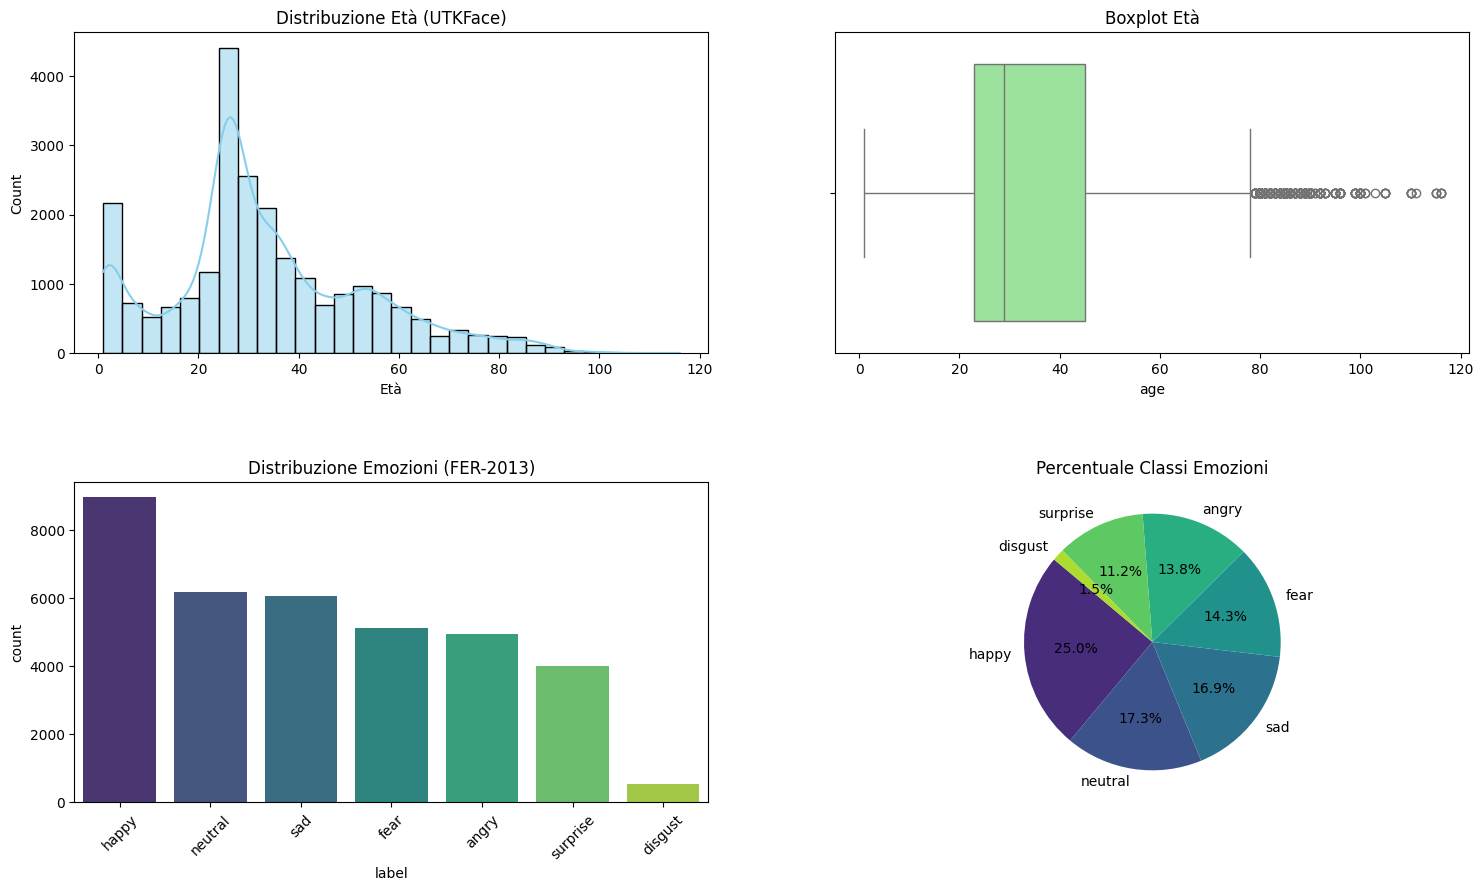

In [6]:
print("\n📊 Generazione grafici di distribuzione...")
# Uniamo train e val solo per visualizzare la statistica globale
full_emotion_df = pd.concat([train_emotion_df, val_emotion_df])
full_age_df = pd.concat([train_age_df, val_age_df])
plot_distributions(full_age_df, full_emotion_df)